<a href="https://colab.research.google.com/github/AniketKS30/Deep-Learning/blob/main/Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd

path = "/content/drive/MyDrive/Datasets/Boston.csv"
df = pd.read_csv(path)

In [20]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# **Linear Regression from scratch**

In [116]:
#import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [118]:
# initializing our inputs and outputs
X = df['rm'].values
Y = df['medv'].values
# mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)
#total number of values
n = len(X)
# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
#printing the coefficient
print(b1, b0)

9.102108981180303 -34.67062077643851


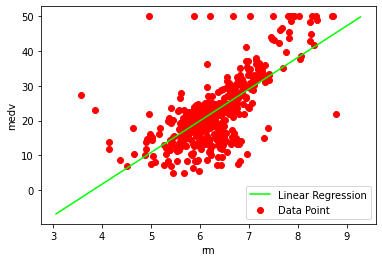

In [122]:
#plotting values 
x_max = np.max(X) + 0.5
x_min = np.min(X) - 0.5
#calculating line values of x and y
x = np.linspace(x_min, x_max, 40)
y = b0 + b1 * x
#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')
#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')
# x-axis label
plt.xlabel('rm')
#y-axis label
plt.ylabel('medv')
plt.legend()
plt.show()

In [123]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)
print(rmse)

6.6030713892225625


In [124]:
sumofsquares = 0
sumofresiduals = 0
for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)
print(score)

0.48352545599133423


# **Simple Linear Regression**

Estimated coefficients:
b_0 = -34.67062077643847     
b_1 = 9.102108981180296


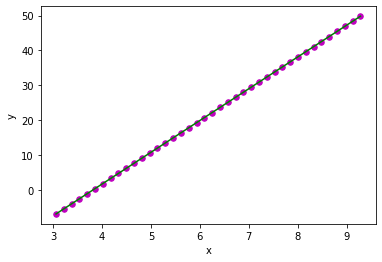

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
  # number of observations/points
  n = np.size(x)

  # mean of x and y vector
  m_x = np.mean(x)
  m_y = np.mean(y)

  # calculating cross-deviation and deviation about x
  SS_xy = np.sum(y*x) - n*m_y*m_x
  SS_xx = np.sum(x*x) - n*m_x*m_x

  # calculating regression coefficients
  b_1 = SS_xy / SS_xx
  b_0 = m_y - b_1*m_x

  return (b_0, b_1)

def plot_regression_line(x, y, b):
  # plotting the actual points as scatter plot
  plt.scatter(x, y, color = "m",
      marker = "o", s = 30)

  # predicted response vector
  y_pred = b[0] + b[1]*x

  # plotting the regression line
  plt.plot(x, y_pred, color = "g")

  # putting labels
  plt.xlabel('x')
  plt.ylabel('y')

  # function to show plot
  plt.show()

def main():
  # observations / data
  X = df['rm'].values
  Y = df['medv'].values

  # estimating coefficients
  b = estimate_coef(x, y)
  print("Estimated coefficients:\nb_0 = {} \
    \nb_1 = {}".format(b[0], b[1]))

  # plotting regression line
  plot_regression_line(x, y, b)

if __name__ == "__main__":
  main()
